### Mounting drive


In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Importing dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
dataframe = pd.read_csv("/content/drive/My Drive/winequality-red.csv", sep=";")

In [9]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
dataframe.shape, dataframe.columns, dataframe["quality"].unique()

((1599, 12),
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'),
 array([5, 6, 7, 4, 8, 3]))

In [11]:
# A dictionay
quality_mapping = {
    5:3, 6:4, 7:5, 4:1, 8:5, 3:0
}

In [12]:
dataframe.loc[:,"quality"] = dataframe.quality.map(quality_mapping)

dataframe["quality"].unique()

array([3, 4, 5, 1, 0])

In [13]:
dataframe["quality"].value_counts()

3    681
4    638
5    217
1     53
0     10
Name: quality, dtype: int64

In [14]:
# Just list
independent_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
      
target_feature = ["quality"]

In [15]:
# Since target is unbalanced, we are going for stratify split based in target
x_train, x_test, y_train, y_test = train_test_split( dataframe[independent_features], dataframe[target_feature], 
                                                    shuffle=True, test_size=0.2, stratify=dataframe[target_feature])

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279, 1), (320, 1))

* x_test is completely only for testing, cv has to be done on top of the x_train 

### Applying simple model on top of cross validation model

In [92]:
def understand_via_pot(clf_result, figsize):
  from matplotlib import pyplot as plt
  plt.figure(figsize=figsize)
  plt.plot(clf_result.cv_results_.get("mean_test_score"), 'go--')
  plt.show()
  for index,parm_combination in enumerate(clf_result.cv_results_.get("params")):
    print(str(index) + " --->" + str(parm_combination) + "--->" + str(clf_result.cv_results_.get("mean_test_score")[index]))
  print("%"*100)
  print('Best Score: %s' % clf_result.best_score_)
  print('Best Hyperparameters: %s' % clf_result.best_params_)
  print('Scoring: %s' % clf.scorer_)

In [99]:
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Define the model
rf = RandomForestClassifier()

# Define the hyper param search 
space = dict()
space['min_samples_split'] = [5,10,100,200,300,400,500]
space['max_depth'] = [1,5,10,50,100,500,1000]
space["max_features"] = ["auto", 'sqrt', 'log2']
space["n_estimators"] = [10, 40, 80, 100, 500, 1000, None]

# define cross-validation
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True )# Stratified is choosen because of unbalanced target label.
# Shuffuling is always good.

# scoring='f1' is choosen because of unbalanced target, Accuarcy will not be good one. Since problem at hand is multiclass classification, we need to choose f1_macro
clf = RandomizedSearchCV(estimator = rf, param_distributions = space,
                         n_jobs = -1,
                         random_state=0, scoring='f1_macro', cv = cv, verbose=10, )

# The variable params in the above one is:
"""
Scoring method: Based on data
cross-validation framework: K-fold, Stratified K fold, 
Param_distributions: Based on choosen model
estimator: based on model picking
"""
clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=...
                     

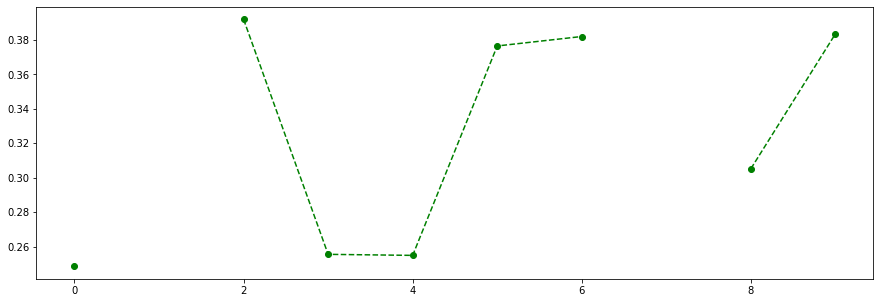

0 --->{'n_estimators': 1000, 'min_samples_split': 500, 'max_features': 'sqrt', 'max_depth': 100}--->0.2484104920867153
1 --->{'n_estimators': None, 'min_samples_split': 100, 'max_features': 'log2', 'max_depth': 50}--->nan
2 --->{'n_estimators': 80, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 500}--->0.3920159260518824
3 --->{'n_estimators': 10, 'min_samples_split': 300, 'max_features': 'auto', 'max_depth': 500}--->0.2554470109639652
4 --->{'n_estimators': 500, 'min_samples_split': 300, 'max_features': 'log2', 'max_depth': 5}--->0.25483812587350574
5 --->{'n_estimators': 500, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 100}--->0.37655000867841426
6 --->{'n_estimators': 1000, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 100}--->0.3820486461019449
7 --->{'n_estimators': None, 'min_samples_split': 100, 'max_features': 'auto', 'max_depth': 10}--->nan
8 --->{'n_estimators': 1000, 'min_samples_split': 100, 'max_features': 'log2', 'max_depth'

In [100]:
understand_via_pot(clf, figsize=(15,5))

In [106]:
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Define the model
rf = RandomForestClassifier()

# Define the hyper param search 
space = dict()
space['min_samples_split'] = [5,10,100,200,300,400,500]
space['max_depth'] = [1,5,10,50,100,500,1000]
space["max_features"] = ["auto", 'sqrt', 'log2']
space["n_estimators"] = [10, 40, 80, 100, 500, 1000, None]

# define cross-validation
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True )# Stratified is choosen because of unbalanced target label.
# Shuffuling is always good.

# scoring='f1' is choosen because of unbalanced target, Accuarcy will not be good one. Since problem at hand is multiclass classification, we need to choose f1_macro
clf = GridSearchCV(estimator = rf, param_grid = space,
                         n_jobs = -1,
                          scoring='f1_macro', cv = cv, verbose=10, )

# The variable params in the above one is:
"""
Scoring method: Based on data
cross-validation framework: K-fold, Stratified K fold, 
Param_distributions: Based on choosen model
estimator: based on model picking
"""
clf.fit(x_train, y_train)

Fitting 5 folds for each of 1029 candidates, totalling 5145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              oob_score=False,
                                              random_state=None, verbose=0,
     

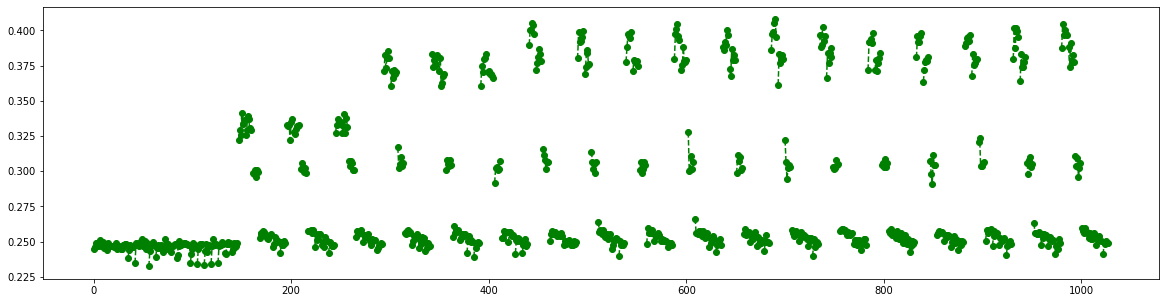

0 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 10}--->0.2444638377099647
1 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 40}--->0.24600795088732563
2 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 80}--->0.24881406949519524
3 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}--->0.24925996035091158
4 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}--->0.2471269752381106
5 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 1000}--->0.24861399665003736
6 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': None}--->nan
7 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 10}--->0.2508555889832477
8 --->{'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 40}--->0.247

In [107]:
understand_via_pot(clf, figsize=(20,5))

In [130]:
best_rf = clf.best_estimator_
best_rf.fit(x_train, y_train.values.reshape(1,-1)[0])
predicted_train_y = best_rf.predict(x_train)
predicted_test_y = best_rf.predict(x_test)

In [129]:
y_train.values.reshape(1,-1)[0]

array([4, 4, 3, ..., 4, 4, 3])

In [131]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, predicted_train_y))
print(accuracy_score(y_test, predicted_test_y))

0.9976544175136826
0.725


In [133]:
# Saving the model to drive as pickle file
import pickle
pickle_out = open("/content/drive/My Drive/rf_classifier.pkl", "wb")
pickle.dump(best_rf, pickle_out)

In [134]:
# Reading back the pickle

pickle_in = open("/content/drive/My Drive/rf_classifier.pkl", "rb")
pickle_rf = pickle.load(pickle_in)

In [137]:
# Predicting with our pickle model
pickle_rf.predict(x_test)

array([3, 4, 3, 5, 5, 3, 3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 3, 3, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 4, 4, 3, 3, 4, 3, 3, 4, 5,
       5, 5, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4,
       3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 5, 3, 4, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 5, 4, 4, 4, 3, 4, 4, 5, 4, 5,
       3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 5, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4,
       4, 3, 4, 5, 4, 3, 3, 4, 4, 5, 4, 4, 4, 4, 4, 3, 3, 4, 3, 5, 3, 3,
       3, 5, 3, 3, 4, 3, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 5, 4, 3, 4, 3, 4,
       4, 4, 4, 5, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 5, 4, 5, 4,
       3, 3, 5, 4, 4, 3, 3, 5, 4, 4, 3, 3, 3, 5, 3, 3, 4, 3, 3, 4, 3, 4,
       4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3,
       4, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4,

In [138]:
import struct
print( 8 * struct.calcsize("P"))

64


In [140]:
import sklearn

In [141]:
sklearn.__version__

'0.22.2.post1'